In [ ]:
!pip install numpy pydicom scikit-image tensorflow pycaret pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pydicom
import os
from skimage.transform import resize
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from pycaret.classification import *
import pandas as pd

In [ ]:
# Load VGG16 base model with custom input size (1152, 896, 3)
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(1152, 896, 3))

# Add custom layers on top of the base model for feature extraction
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

# Feature extractor model
ft_ext_vgg = Model(inputs=base_model.input, outputs=x)

# Compile the model
ft_ext_vgg.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

# Summary of the new model
ft_ext_vgg.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1152, 896, 3)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 1152, 896, 64)       │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 1152, 896, 64)       │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 576, 448, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 576, 448, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 576, 448, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 288, 224, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 288, 224, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 288, 224, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 288, 224, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 144, 112, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 144, 112, 512)       │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 144, 112, 512)       │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 144, 112, 512)       │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 72, 56, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 72, 56, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 72, 56, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 72, 56, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 36, 28, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         525,3

 Total params: 15,240,000 (58.14 MB)

 Trainable params: 15,240,000 (58.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# User input for the single DICOM image path
# dicom_image_path = input("Please enter the full path to the DICOM image: ")
dicom_image_path = r"/content/20587054_b6a4f750c6df4f90_MG_R_CC_ANON.dcm"

# User input for the output directory to save the extracted features
# output = input("Please enter the directory path to save the extracted features: ")

# 3D numpy array to store the image temporarily (for RGB images)
img_zeros = np.zeros(shape=(1152, 896, 3))

# Read and preprocess the single image
img2 = pydicom.dcmread(dicom_image_path)
img3 = img2.pixel_array
img4 = img3 * (255 / 16383)  # Normalize pixel values
img5 = resize(img4, [1152, 896], anti_aliasing=True)  # Resize image

# Stack the grayscale image into 3 channels (convert to RGB)
img_zeros[:, :, 0] = img5
img_zeros[:, :, 1] = img5
img_zeros[:, :, 2] = img5



In [ ]:
# ------------------- Classification Model Loading and Prediction -------------------

# Load the saved classification model (ensure the .pkl file is available)
# model = load_model(r'/content/drive/MyDrive/dataset INbreast/INbreast Release 1.0/INbreast Release 1.0/new_best_classification_model_data_aug')
model = load_model(r'/content/drive/MyDrive/final_model')

# Create a DataFrame from the extracted features for the single image
columns = [f'feature_{i}' for i in range(ft_final_test.shape[1])]
df_test_features = pd.DataFrame(ft_final_test, columns=columns)

# Run predictions using the loaded model
predictions = predict_model(model, data=df_test_features)

# Print the predictions
print("Prediction Results:")
print(predictions.head())

Transformation Pipeline and Model Successfully Loaded


NameError: name 'ft_final_test' is not defined

In [ ]:
#@title For all in testing

In [ ]:
import numpy as np
import pandas as pd
import pydicom
from skimage.transform import resize
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Load the training and test features and labels
output = '/content/drive/MyDrive/dataset INbreast/INbreast Release 1.0/INbreast Release 1.0'
vgg_tr_ft_combined = np.load(os.path.join(output, 'new_vgg_tr_ft.npy'))
vgg_ts_ft = np.load(os.path.join(output, 'new_vgg_ts_ft.npy'))

tr_lbs_combined = np.load(os.path.join(output, 'tr_lbs.npy'))
ts_lbs = np.load(os.path.join(output, 'ts_lbs.npy'))

print("Training Features Shape:", vgg_tr_ft_combined.shape)
print("Training Labels Shape:", tr_lbs_combined.shape)
print("Test Features Shape:", vgg_ts_ft.shape)
print("Test Labels Shape:", ts_lbs.shape)


Training Features Shape: (281, 1024)
Training Labels Shape: (281,)
Test Features Shape: (107, 1024)
Test Labels Shape: (107,)


In [ ]:
# Update labels mapping
label_mapping = {1: 0, 2: 1, 4: 2, 5: 3}
# tr_lbs_combined_mapped = np.vectorize(label_mapping.get)(tr_lbs_combined)
ts_lbs_mapped = np.vectorize(label_mapping.get)(ts_lbs)


In [ ]:
# Load the saved classification model
final_model = load_model(r'/content/drive/MyDrive/final_model')

# Create a DataFrame from the test features
columns = [f'feature_{i}' for i in range(vgg_ts_ft.shape[1])]
df_test_features = pd.DataFrame(vgg_ts_ft, columns=columns)

Transformation Pipeline and Model Successfully Loaded


In [ ]:
# Run predictions using the loaded model
predictions = model.predict(df_test_features)

# Check the shape of the predictions
print("Predictions shape:", predictions.shape)

# Determine if binary or multi-class
if predictions.ndim == 1:  # Binary classification
    print("we are screwed!!")
    predicted_classes = (predictions > 0.5).astype(int)
else:  # Multi-class classification
    print("yes")
    predicted_classes = np.argmax(predictions, axis=1)


Predictions shape: (107,)
we are screwed!!


In [ ]:
# Print the predictions
print("Prediction Results:")
print(predicted_classes)

Prediction Results:
[1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1]


In [ ]:
# Get true labels for the test set
true_labels = ts_lbs_mapped
true_labels

array([1, 1, 2, 3, 0, 3, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 3, 2, 1, 1, 1, 2,
       3, 0, 1, 1, 1, 2, 0, 1, 3, 1, 2, 1, 3, 3, 2, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1, 3, 3, 0, 0, 0, 1, 1, 2,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 0, 1])

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 3 13  0  0]
 [10 53  0  0]
 [ 1 12  0  0]
 [ 4 11  0  0]]


In [ ]:
# Generate a classification report
class_report = classification_report(true_labels, predicted_classes)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.19      0.18        16
           1       0.60      0.84      0.70        63
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00        15

    accuracy                           0.52       107
   macro avg       0.19      0.26      0.22       107
weighted avg       0.38      0.52      0.44       107



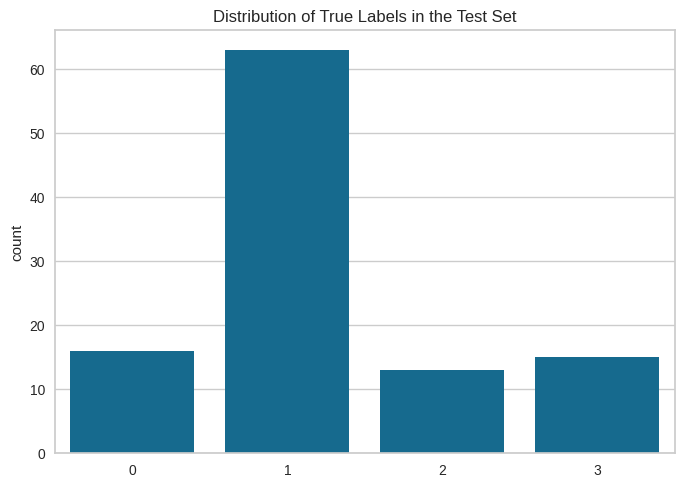

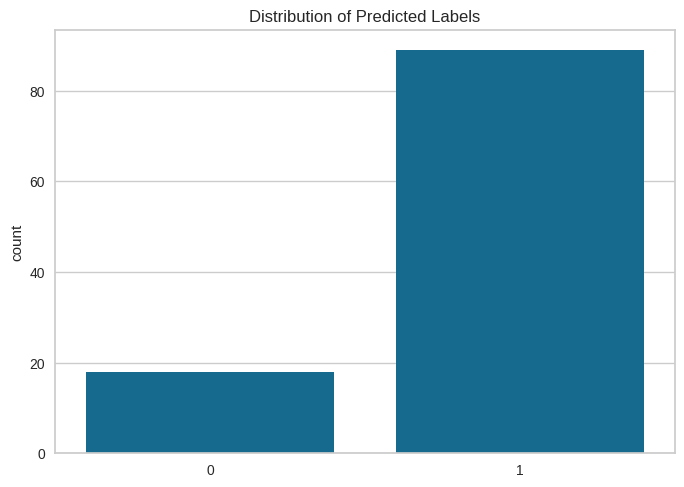

Raw Predicted Probabilities (first 5 samples):
[[0.32 0.39 0.08 0.21]
 [0.3  0.35 0.14 0.21]
 [0.12 0.47 0.24 0.17]
 [0.06 0.58 0.25 0.11]
 [0.17 0.43 0.15 0.25]]


In [ ]:
# Check the distribution of the true labels
import matplotlib.pyplot as plt
import seaborn as sns

# Plot true labels distribution
sns.countplot(x=true_labels)
plt.title("Distribution of True Labels in the Test Set")
plt.show()

# Check the distribution of predictions
sns.countplot(x=predicted_classes)
plt.title("Distribution of Predicted Labels")
plt.show()

# If you want to print raw probabilities (before thresholding)
predictions_proba = model.predict_proba(df_test_features)
print("Raw Predicted Probabilities (first 5 samples):")
print(predictions_proba[:5])